In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_images_unn.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_masks_unn.npy')

In [3]:
X_test = images[2893:3616]
y_test = masks[2893:3616]

In [4]:
images = images[0:2893]
masks = masks[0:2893]

In [5]:
images.shape

(2893, 512, 512, 1)

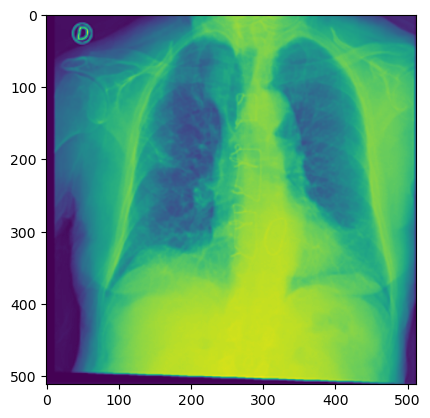

In [6]:
imshow(images[100])

In [7]:
masks.shape

(2893, 512, 512, 1)

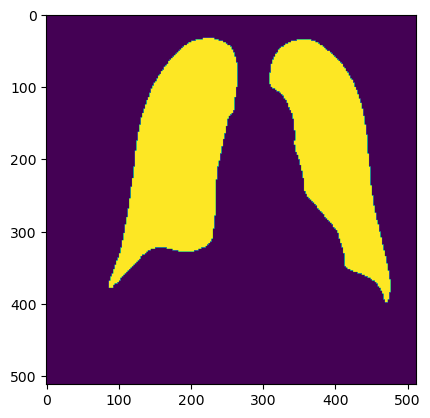

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpofrf4l4wkuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpimshvhnqkuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpimshvhnqkuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=10, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_2_10_covid.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
9/9 [==============================] - 16s 707ms/step - loss: 0.3700 - dice_coeff: 0.5352 - val_loss: 0.3578 - val_dice_coeff: 0.5531
Epoch 2/100
9/9 [==============================] - 4s 525ms/step - loss: 0.3446 - dice_coeff: 0.5616 - val_loss: 0.3532 - val_dice_coeff: 0.5571
Epoch 3/100
9/9 [==============================] - 4s 520ms/step - loss: 0.3469 - dice_coeff: 0.5593 - val_loss: 0.3438 - val_dice_coeff: 0.5456
Epoch 4/100
9/9 [==============================] - 4s 516ms/step - loss: 0.3440 - dice_coeff: 0.5681 - val_loss: 0.3408 - val_dice_coeff: 0.5419
Epoch 5/100
9/9 [==============================] - 4s 522ms/step - loss: 0.3340 - dice_coeff: 0.5702 - val_loss: 0.3422 - val_dice_coeff: 0.5655
Epoch 6/100
9/9 [==============================] - 4s 515ms/step - loss: 0.3369 - dice_coeff: 0.5866 - val_loss: 0.3396 - val_dice_coeff: 0.5704
Epoch 7/100
9/9 [==============================] - 4s 513ms/step - loss: 0.3300 - dic

18/18 [==============================] - 7s 374ms/step - loss: 0.3310 - dice_coeff: 0.5907 - val_loss: 0.3290 - val_dice_coeff: 0.5671
Epoch 4/100
18/18 [==============================] - 7s 376ms/step - loss: 0.3361 - dice_coeff: 0.5741 - val_loss: 0.3271 - val_dice_coeff: 0.5694
Epoch 5/100
18/18 [==============================] - 7s 382ms/step - loss: 0.3282 - dice_coeff: 0.5880 - val_loss: 0.3167 - val_dice_coeff: 0.5795
Epoch 6/100
18/18 [==============================] - 7s 381ms/step - loss: 0.3277 - dice_coeff: 0.5895 - val_loss: 0.3259 - val_dice_coeff: 0.5904
Epoch 7/100
18/18 [==============================] - 7s 375ms/step - loss: 0.3319 - dice_coeff: 0.5858 - val_loss: 0.3260 - val_dice_coeff: 0.5545
Epoch 8/100
18/18 [==============================] - 7s 379ms/step - loss: 0.3193 - dice_coeff: 0.5951 - val_loss: 0.3201 - val_dice_coeff: 0.6013
Epoch 9/100
18/18 [==============================] - 7s 376ms/step - loss: 0.3174 - dice_coeff: 0.6057 - val_loss: 0.3123 - val_di

In [16]:
R.classifier_scores

[[0.3484869599342346, 0.5589919686317444],
 [0.3420730233192444, 0.5842861533164978],
 [0.3367424011230469, 0.5780839323997498],
 [0.319004088640213, 0.6005611419677734],
 [0.345781147480011, 0.5815638899803162],
 [0.3092177212238312, 0.6006360054016113],
 [0.31605264544487, 0.6002998352050781],
 [0.30185288190841675, 0.6059767603874207],
 [0.3439156711101532, 0.5592101216316223],
 [0.3101685643196106, 0.6012621521949768]]

In [17]:
R.discriminator_scores

[[0.13241617381572723, 0.9884393215179443],
 [0.0023606554605066776, 1.0],
 [0.022274840623140335, 0.9942196607589722],
 [0.044702354818582535, 0.9884393215179443],
 [0.025693031027913094, 0.9942196607589722],
 [0.06540439277887344, 0.9942196607589722],
 [7.820811447345477e-07, 1.0],
 [0.07378043234348297, 0.9884393215179443],
 [0.20426242053508759, 0.9884393215179443],
 [0.0029884525574743748, 1.0]]

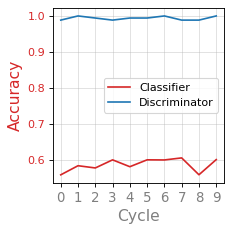

In [18]:
R.plot()

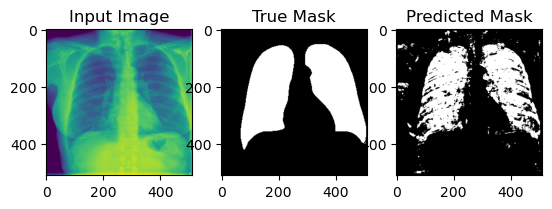

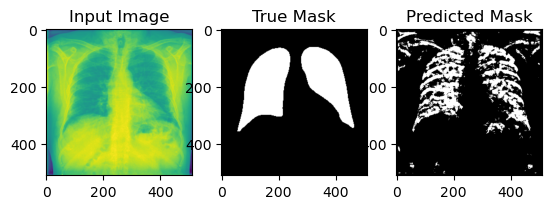

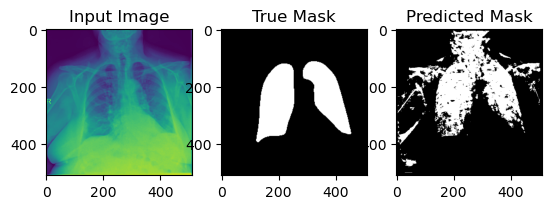

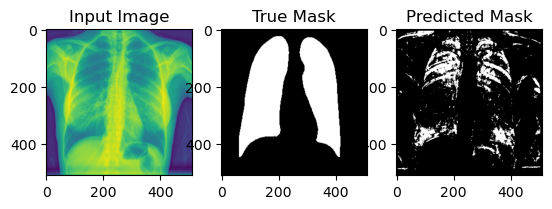

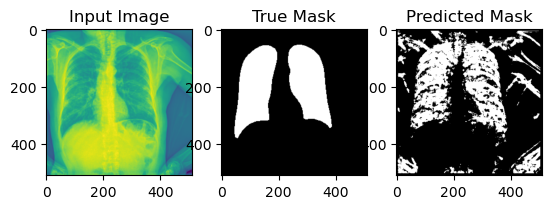

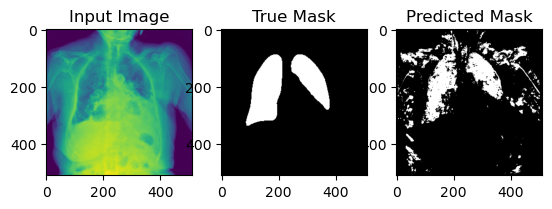

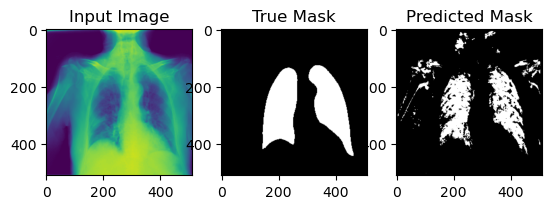

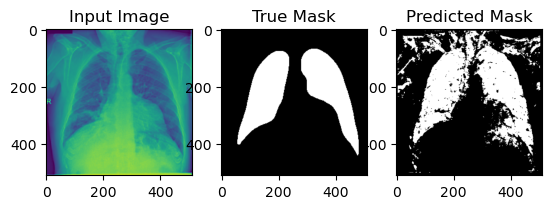

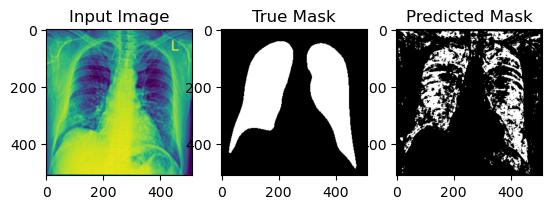

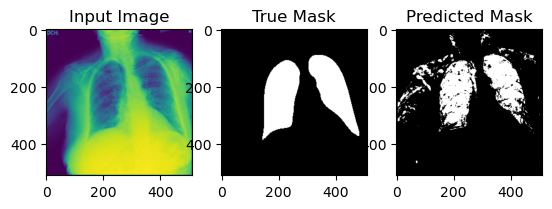

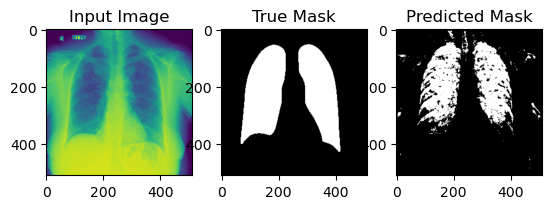

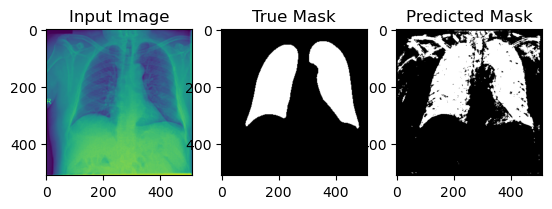

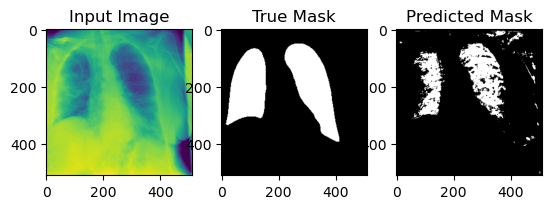

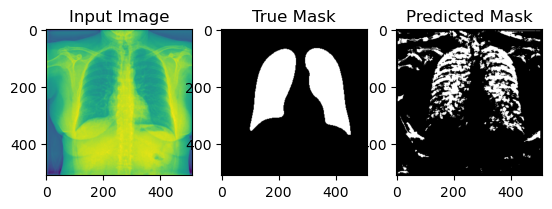

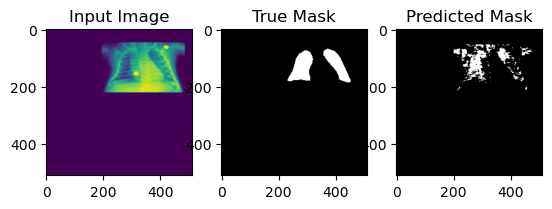

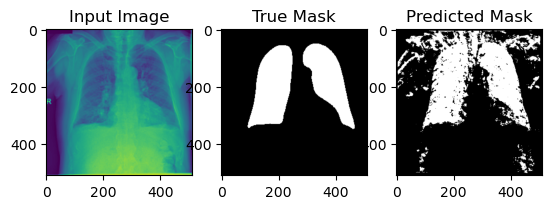

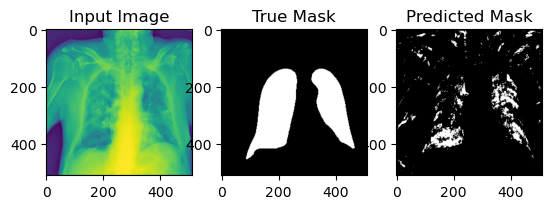

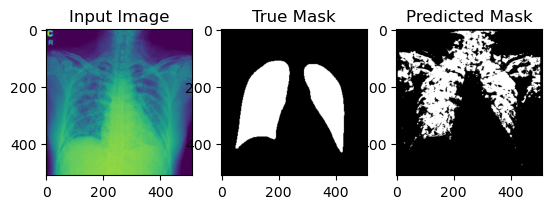

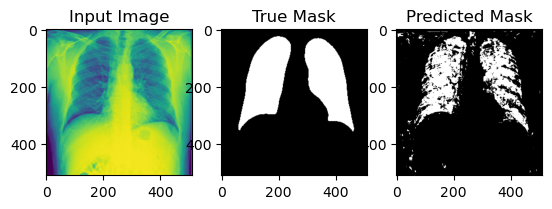

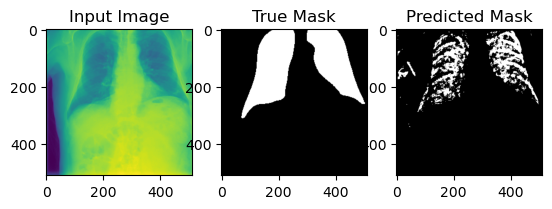

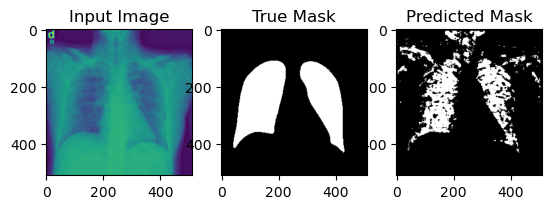

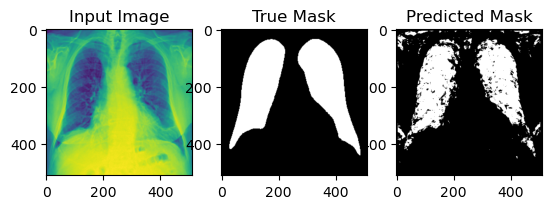

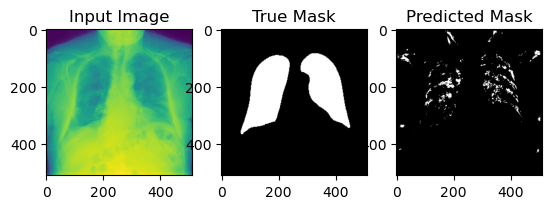

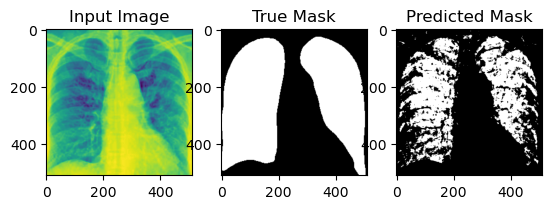

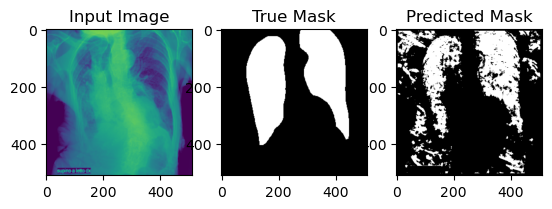

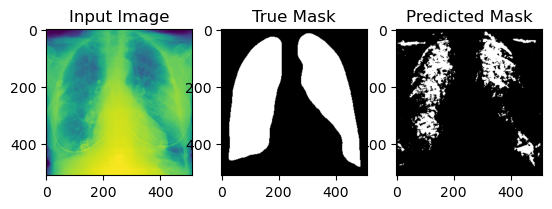

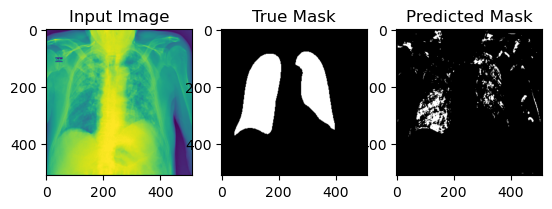

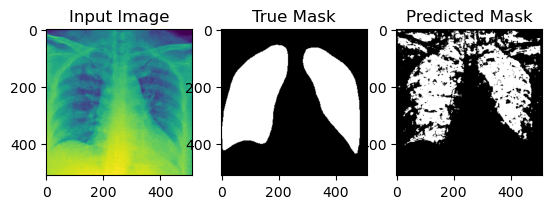

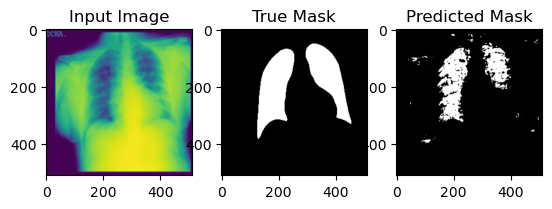

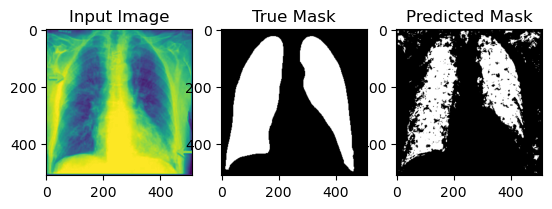

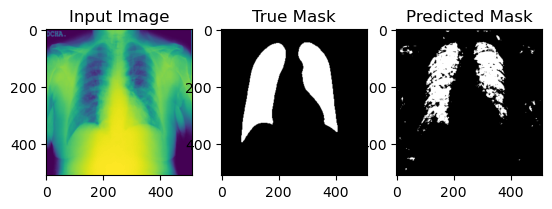

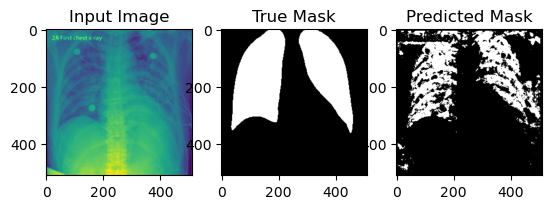

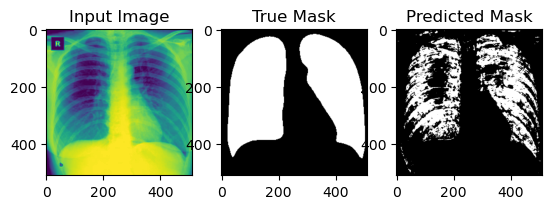

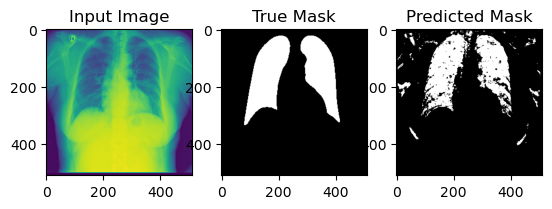

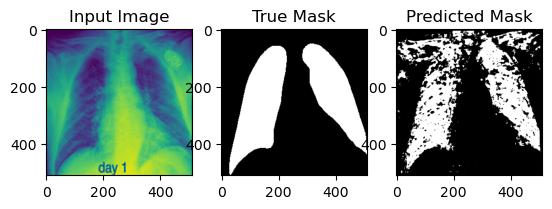

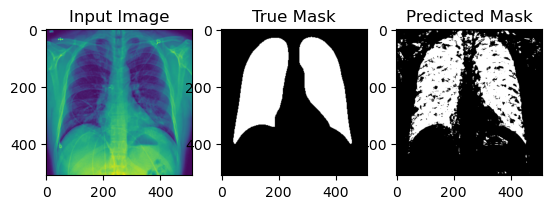

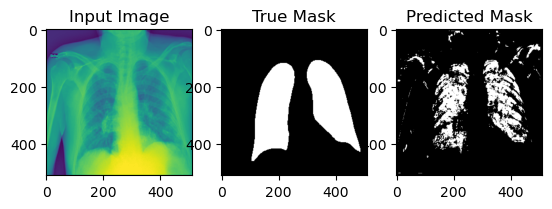

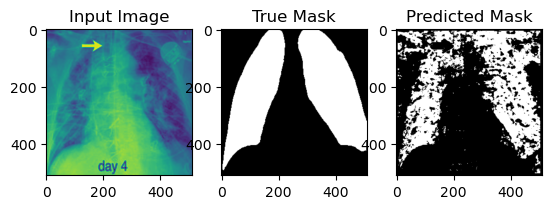

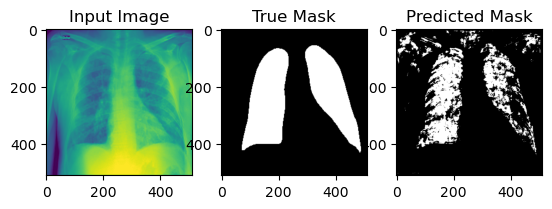

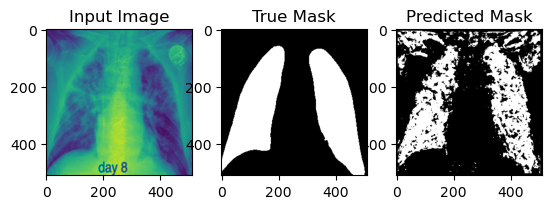

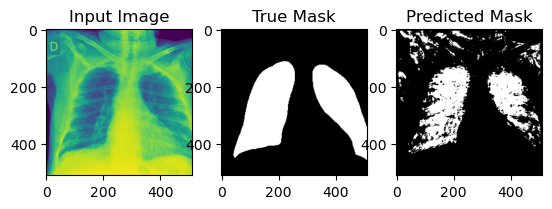

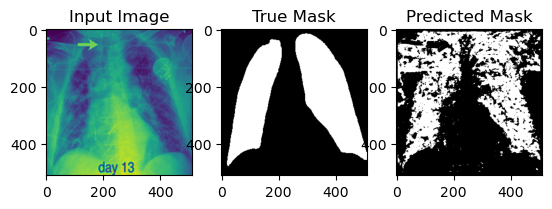

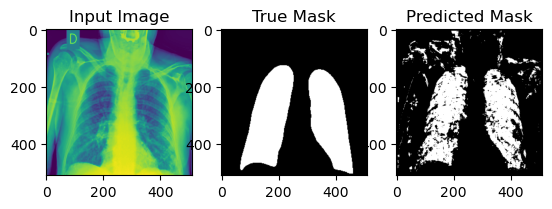

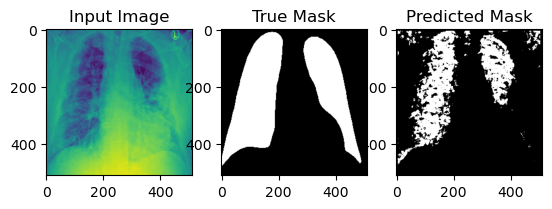

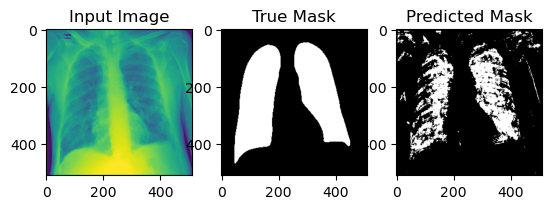

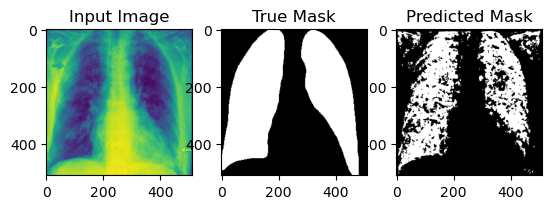

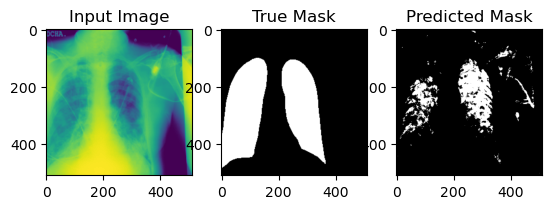

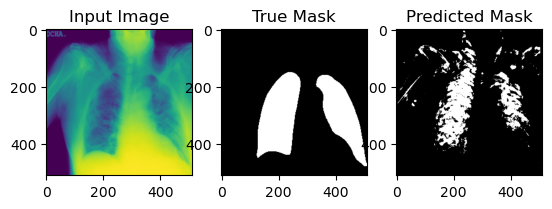

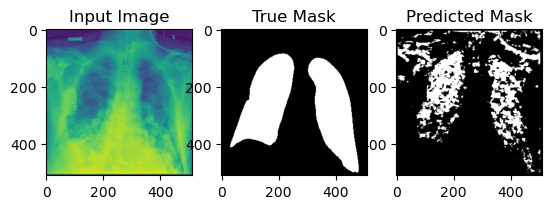

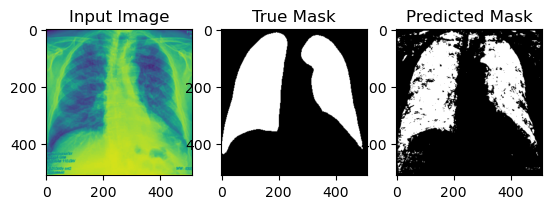

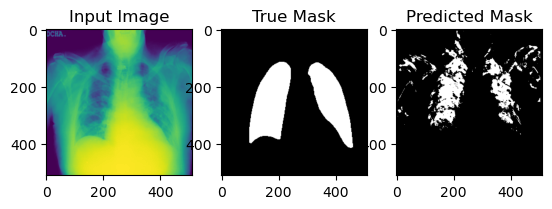

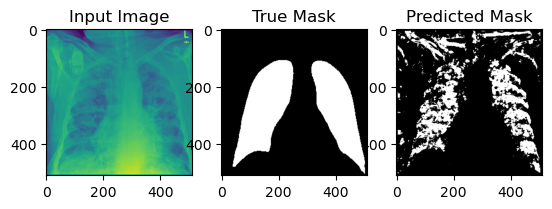

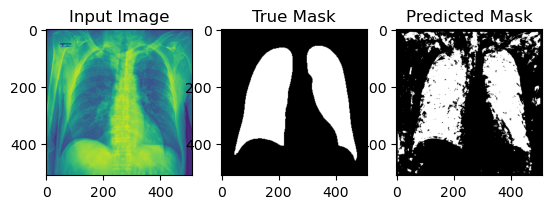

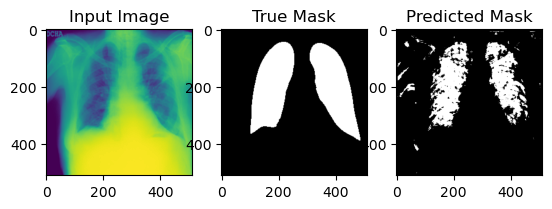

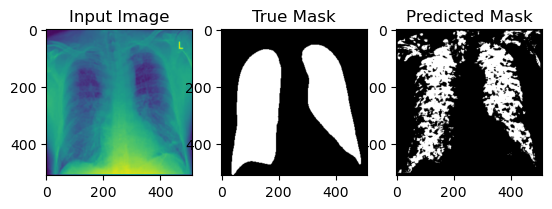

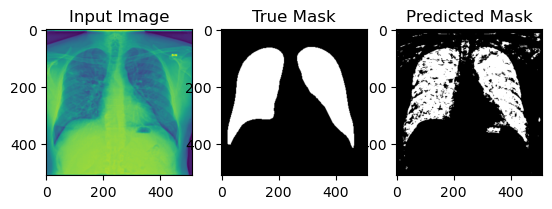

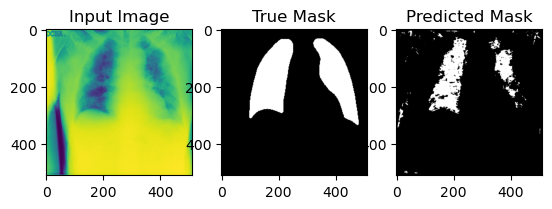

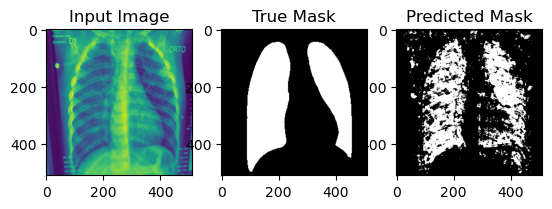

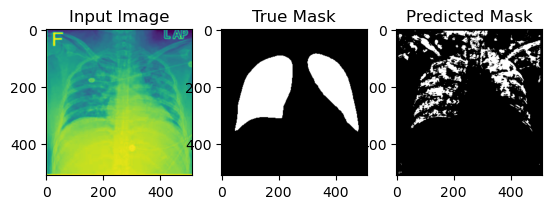

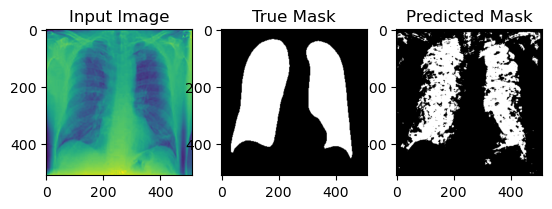

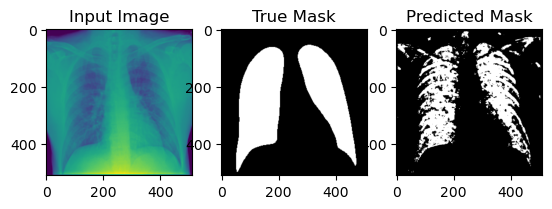

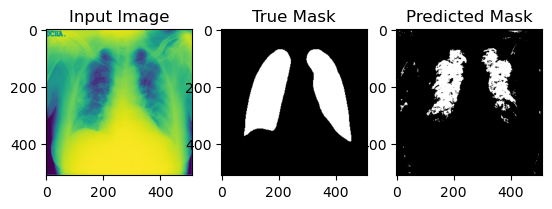

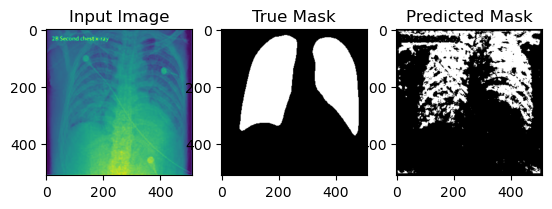

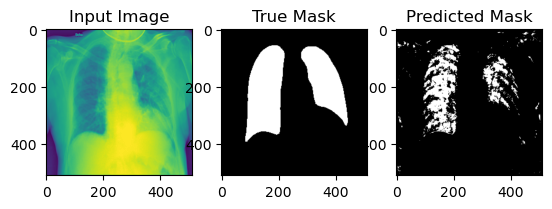

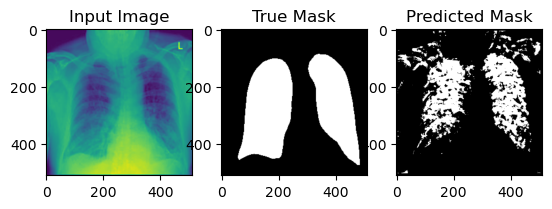

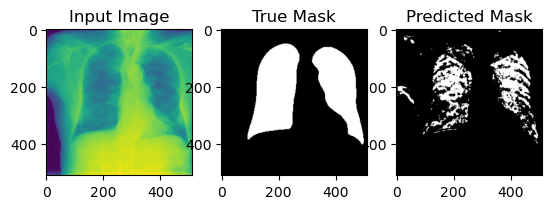

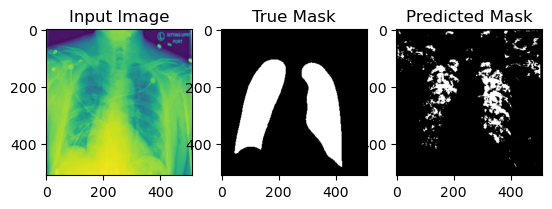

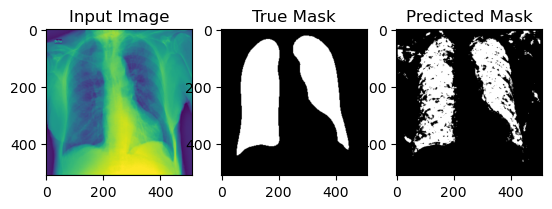

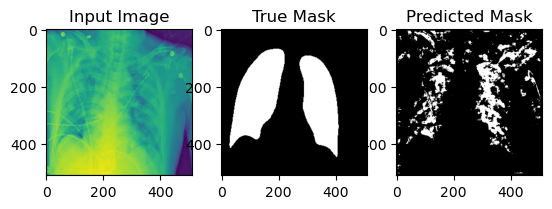

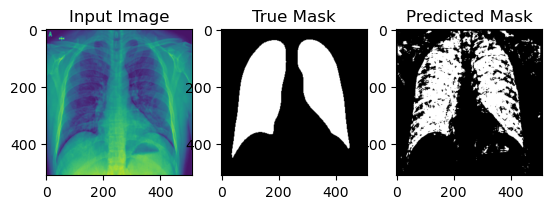

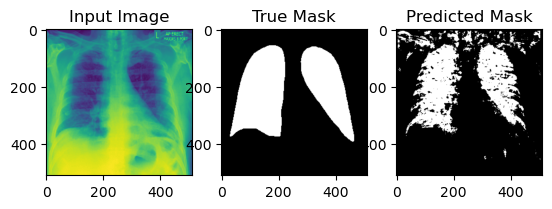

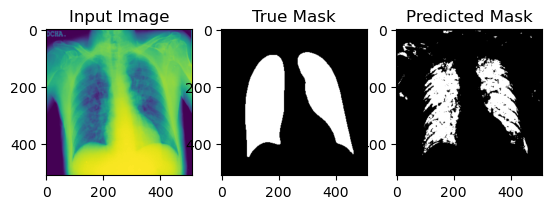

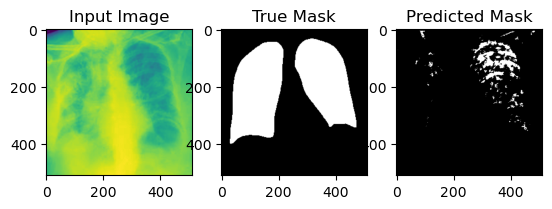

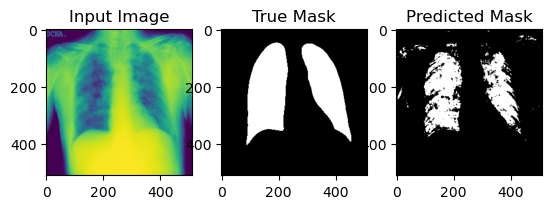

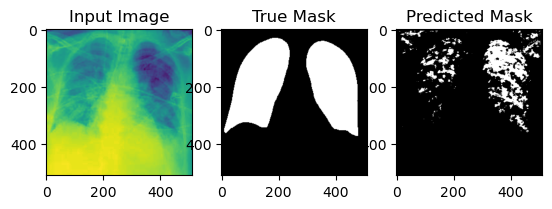

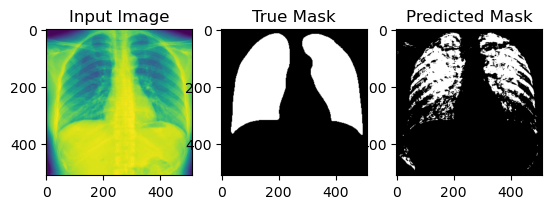

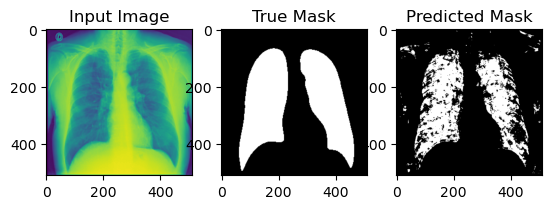

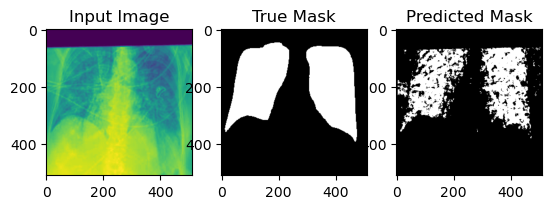

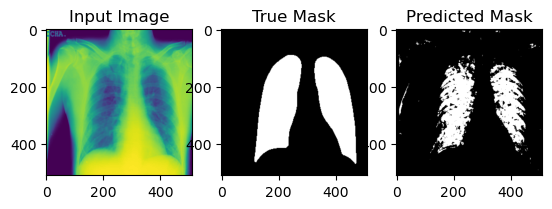

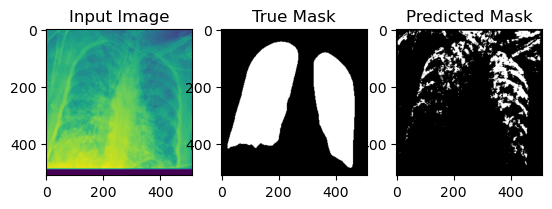

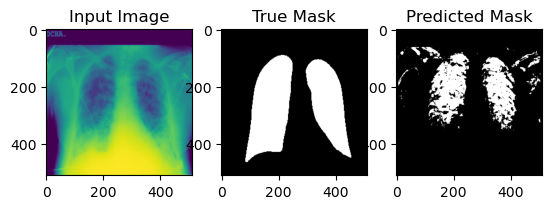

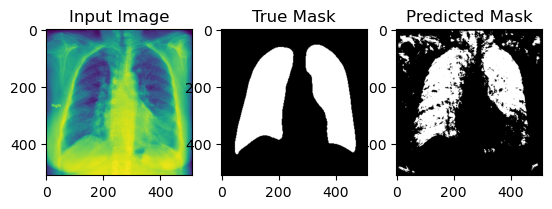

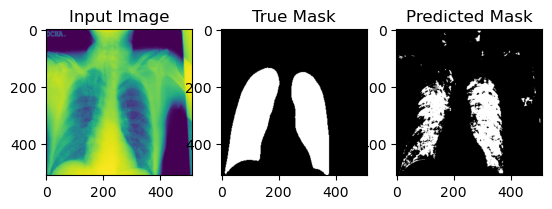

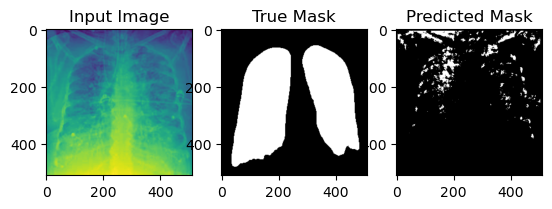

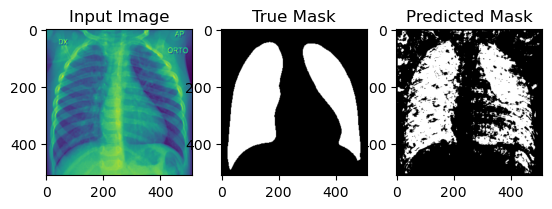

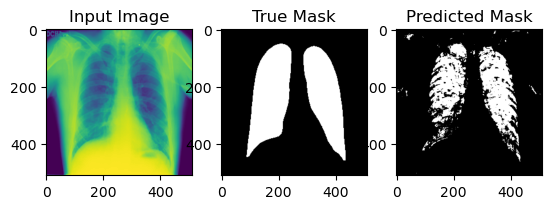

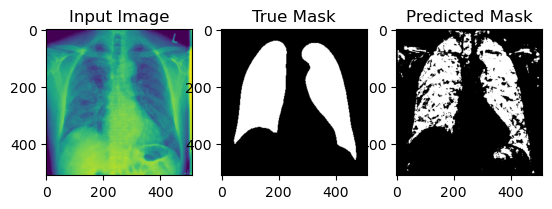

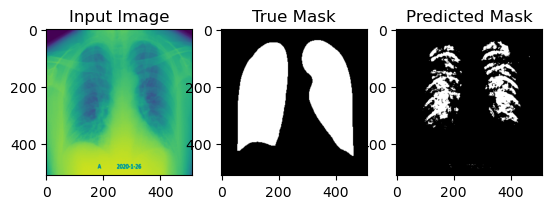

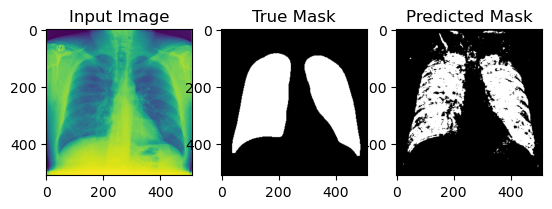

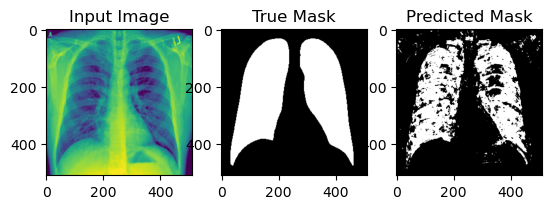

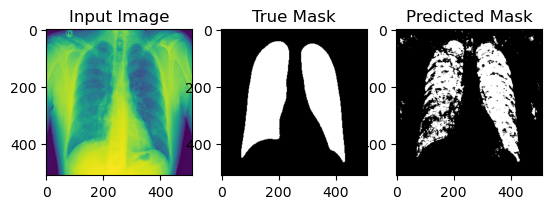

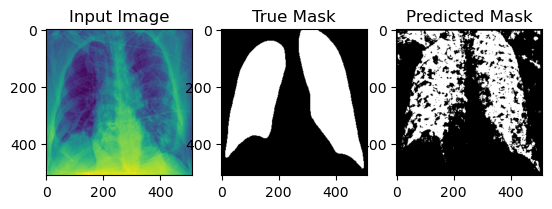

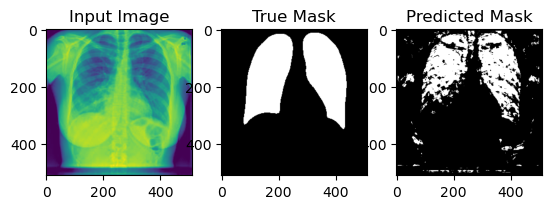

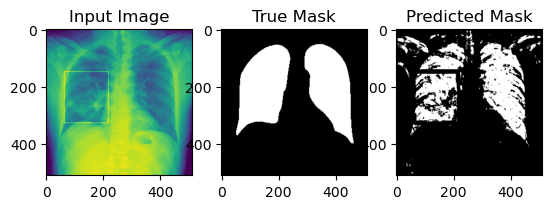

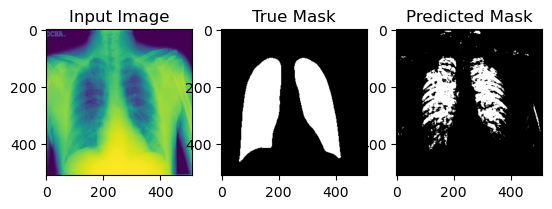

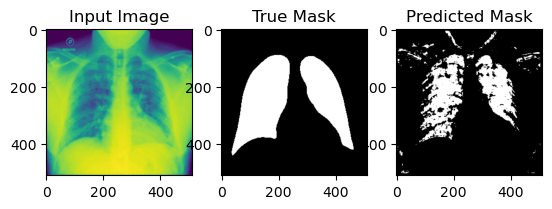

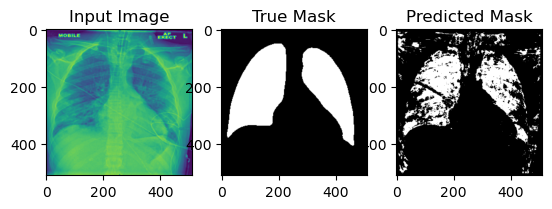

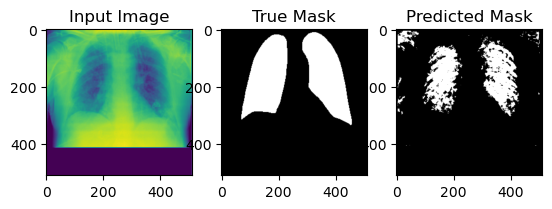

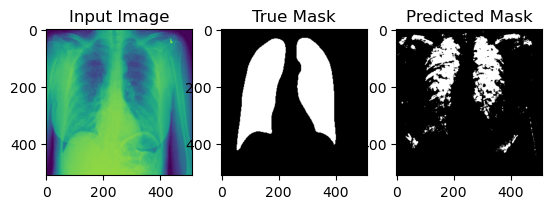

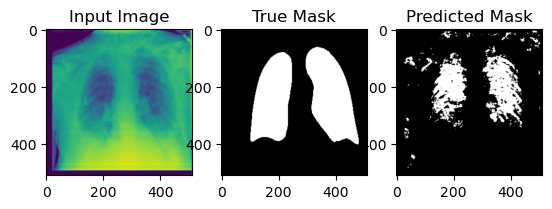

In [19]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [20]:
y_pred = R.classifier.predict(X_test, y_test)

In [21]:
y_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [22]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpofrf4l4wkuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpimshvhnqkuc_unet2d


In [23]:
barebone_pred = BareBone.predict(X_test, y_test)

In [24]:
barebone_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [25]:
R.classifier.model.metrics_names

['loss', 'dice_coeff']

In [26]:
BareBone.model.metrics_names

['loss', 'dice_coeff']